In [2]:
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
from dtreeviz.trees import dtreeviz
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
nonlbls = ['AvgPowerDensity', 'ModDensity', 'UiWeight']
def XY(dfXY):
    dfX = dfXY.drop(lbls, axis=1)
    for nonlbl in nonlbls+['total']:
        if nonlbl in dfX.columns:
            dfX.drop(nonlbl, axis=1, inplace=True)
        dfY = dfXY.loc[:, lbls[0]]
    return dfX, dfY

In [4]:
path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
train = pd.read_pickle(path + 'sim_grams_nuc29.pkl')

In [6]:
#nucs = train.columns.tolist()
#[nucs.remove(x) for x in lbls+nonlbls]
train['ReactorType'].sample(3)

362276    pwr
292497    bwr
380374    pwr
Name: ReactorType, dtype: object

In [24]:
X, y = XY(train)
X = scale(X)
clf = DecisionTreeClassifier(max_depth=2, max_features=29, class_weight='balanced')
clf = clf.fit(X, y)

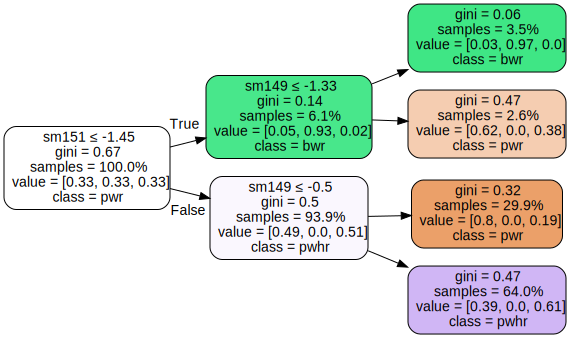

In [29]:
dot_data = export_graphviz(clf, out_file=None, feature_names=nucs, class_names=['pwr', 'bwr', 'pwhr'], max_depth=2,
                           filled=True, rounded=True, special_characters=True, rotate=True, precision=2, 
                           proportion=True)
graph = graphviz.Source(dot_data, format='png')
graph

In [30]:
#graph.write_png("dtree.png")
graph.render("dtree")

'dtree.png'

In [41]:
viz = dtreeviz(clf, X, y, target_name='Reactor Type',
               feature_names=nucs, class_names=['pwr', 'bwr', 'pwhr'])
viz

ValueError: y_data needs to consist only of numerical values. could not convert string to float: 'bwr'